In [66]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/iris.csv')
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [67]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values
StandardScaler = StandardScaler()
X = StandardScaler.fit_transform(X)
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [68]:
Y = Y.reshape(150,1)
enc = preprocessing.OneHotEncoder()
enc.fit(Y)
onehotlabels = enc.transform(Y).toarray()
Y = onehotlabels
Y[:4]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [70]:
def relu(x):
    """
    https://en.wikipedia.org/wiki/Rectifier_(neural_networks)
    """
    return (x + np.abs(x)) / 2

def relu_prime(x):
    return np.heaviside(x, 1)

def sigmoid(x):
    return 1. / (1 + np.exp(-x))

def sigmoid_prime(x):
    return x * (1 - x)

In [71]:
def train(X, y, epochs=50_000, lr=0.001):
    input_size = X.shape[1]
    hidden_layer_size = 16
    output_size = y.shape[1]

    # Initialize random weights
    w_0 = 2*np.random.random((input_size,hidden_layer_size)) - 1
    w_1 = 2*np.random.random((hidden_layer_size, output_size)) - 1

    for i in range(0, epochs):
        # Feed forward
        a_0 = X
        a_1 = sigmoid(np.dot(a_0, w_0))
        a_2 = sigmoid(np.dot(a_1, w_1))

        # How much did we muss the target output?
        a_2_error = a_2 - y

        if (i % 1000 == 0):
            print(f'Error after {i} iterations: {np.mean(np.abs(a_2_error))}')

        # In what direction is the target value?
        a_2_delta = a_2_error * sigmoid_prime(a_2)

        # How much did each a_1 value contribute to the a_2 error (according to weights)?
        a_1_error = np.dot(a_2_delta, w_1.T)

        # In what direction is the target a_1?
        a_1_delta = a_1_error * sigmoid_prime(a_1)

        w_1 -= lr * np.dot(a_1.T, a_2_delta)
        w_0 -= lr * np.dot(a_0.T, a_1_delta)

    return (w_0, w_1)

np.random.seed(420)
# w_0, w_1 = train(X_train, y_train)

In [72]:
def test(X, y, w_0, w_1):
    correct = 0
    for x, y in zip(X, y):
        a_0 = x
        a_1 = sigmoid(np.dot(a_0, w_0))
        a_2 = sigmoid(np.dot(a_1, w_1))
        if np.argmax(a_2) == np.argmax(y):
            correct += 1
    return correct / len(X)

test(X_train, y_train, *train(X_train, y_train))

Error after 0 iterations: 0.4138723141760293
Error after 1000 iterations: 0.2070624563000826
Error after 2000 iterations: 0.17678842670333522
Error after 3000 iterations: 0.1607118844236615
Error after 4000 iterations: 0.14981444802272983
Error after 5000 iterations: 0.14154406163857955
Error after 6000 iterations: 0.1348535180069998
Error after 7000 iterations: 0.12923221057345957
Error after 8000 iterations: 0.1243950708795081
Error after 9000 iterations: 0.12016092125485059
Error after 10000 iterations: 0.11640098061445375
Error after 11000 iterations: 0.11301546442307352
Error after 12000 iterations: 0.10992296490015564
Error after 13000 iterations: 0.10705616555806269
Error after 14000 iterations: 0.10436072472887982
Error after 15000 iterations: 0.10179550145949072
Error after 16000 iterations: 0.09933272978692642
Error after 17000 iterations: 0.0969570665831507
Error after 18000 iterations: 0.09466316923652028
Error after 19000 iterations: 0.09245236912711449
Error after 20000 i

0.9833333333333333

In [84]:
%%capture
import matplotlib.pyplot as plt
e = np.array([i*1000 for i in range(0, 50)])
acc = np.array([test(X_test, y_test, *train(X_train, y_train, epochs=i)) for i in e])

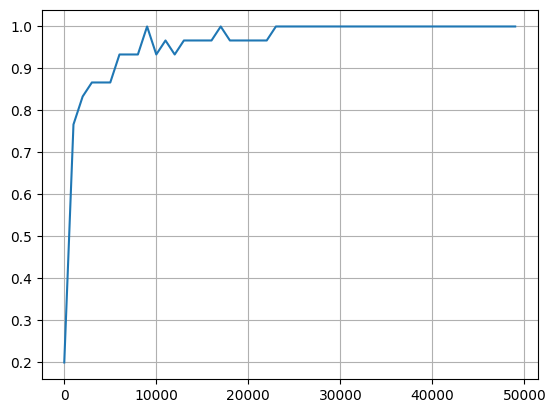

In [85]:
fig, ax = plt.subplots()
ax.grid(True)
plt.plot(e, acc)
plt.show()